In [1]:
!pip install qiskit --quiet
!pip install qiskit-aer --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 65.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 84.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 28.2 MB/s eta 0:00:00


In [3]:
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_state_city, plot_histogram
from qiskit_aer import AerSimulator
import numpy as np


In [15]:
def visualize_hadamard(init_state_vector, label):
    """
    Applies Hadamard to a single-qubit initial state and visualizes results.
    """
    # Build circuit for measurement
    qc = QuantumCircuit(1, 1)
    qc.initialize(init_state_vector, 0)
    qc.h(0)
    qc.measure(0, 0)

    # Statevector before measurement
    qc_state = QuantumCircuit(1)
    qc_state.initialize(init_state_vector, 0)
    qc_state.h(0)
    state_after = Statevector.from_instruction(qc_state)

    print(f"--- {label} ---")
    print("After Hadamard, statevector:", state_after.data)

    # Visualizations
    display(plot_bloch_multivector(state_after, title=f"Bloch Sphere: H on {label}"))
    display(plot_state_city(state_after, title=f"State City: H on {label}"))

    # Simulation with AerSimulator
    sim = AerSimulator()
    qc_t = transpile(qc, sim)
    result = sim.run(qc_t, shots=1024).result()
    counts = result.get_counts()
    display(plot_histogram(counts, title=f"Measurement Histogram: H on {label}"))
    print("\n")


--- |0> ---
After Hadamard, statevector: [0.70710678+0.j 0.70710678+0.j]


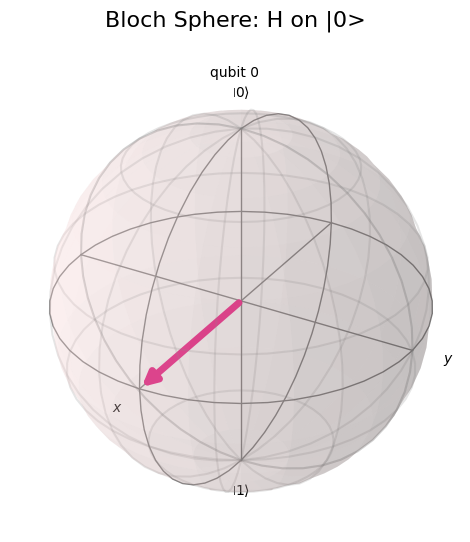

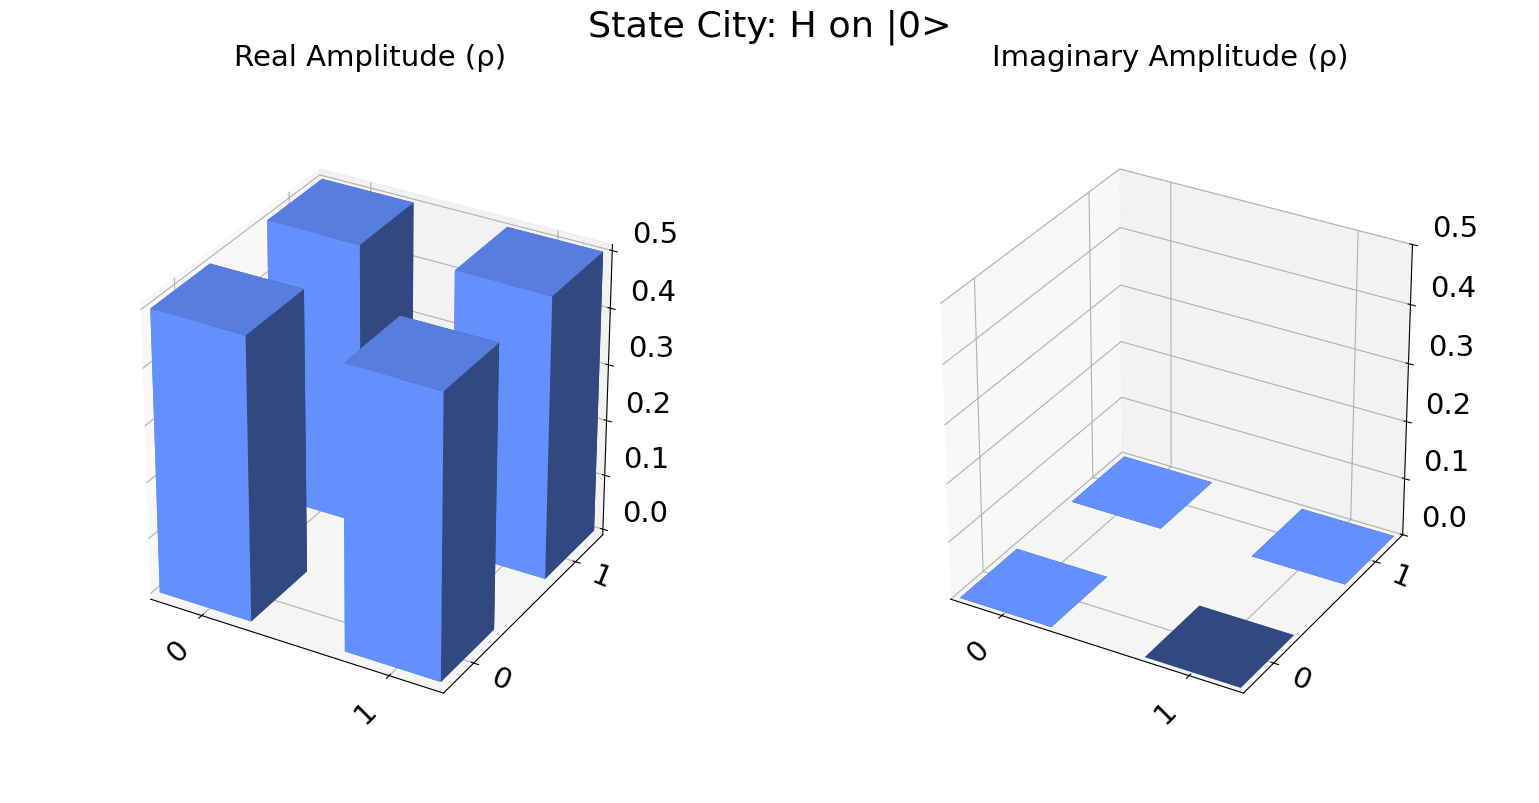

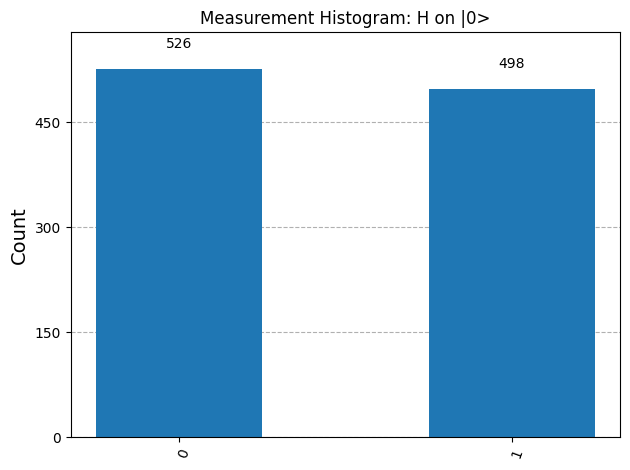



--- |1> ---
After Hadamard, statevector: [ 0.70710678+0.j -0.70710678+0.j]


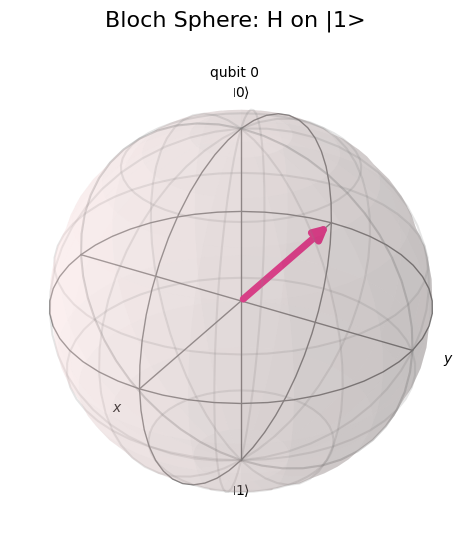

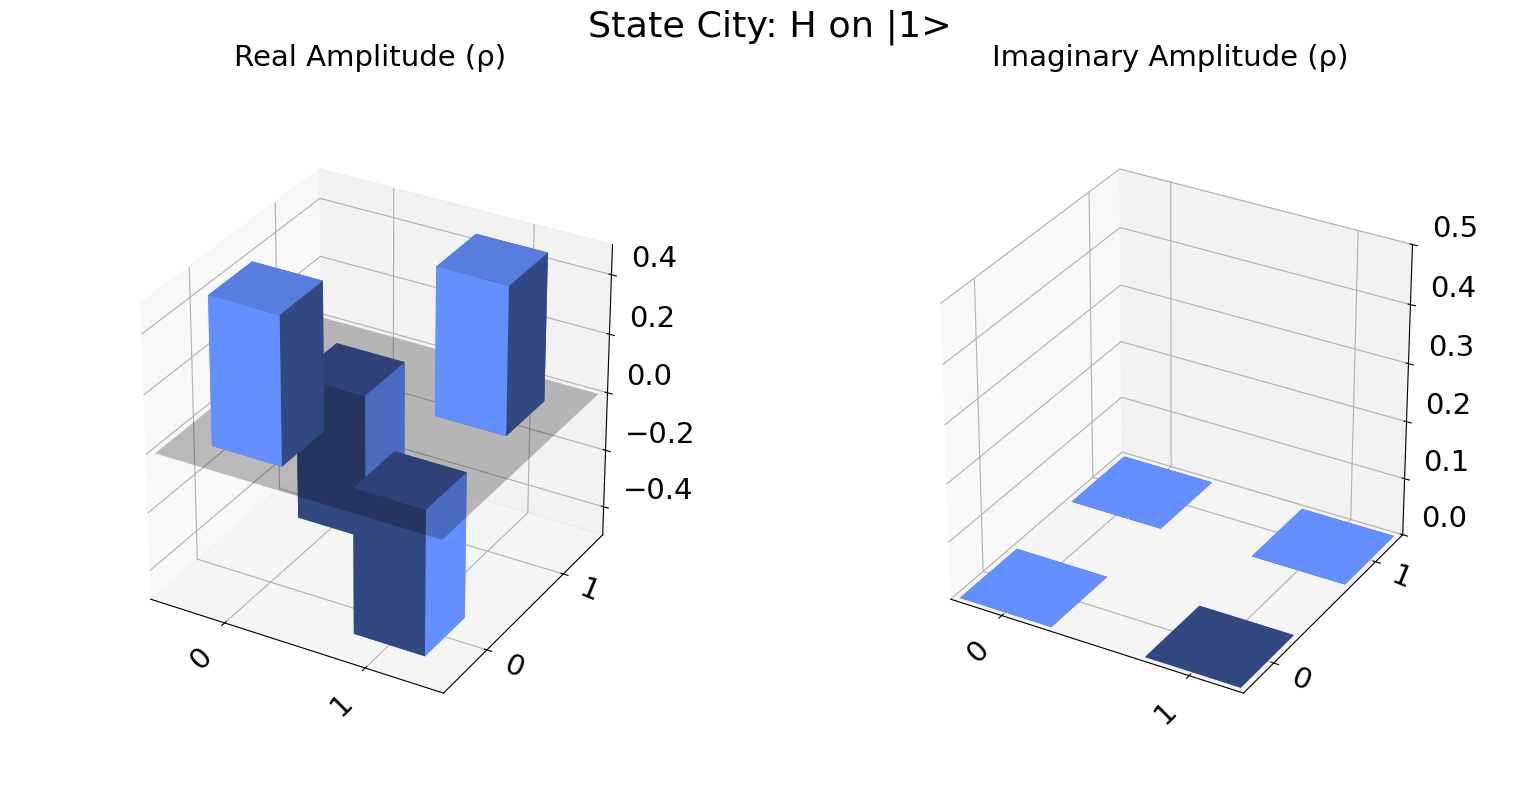

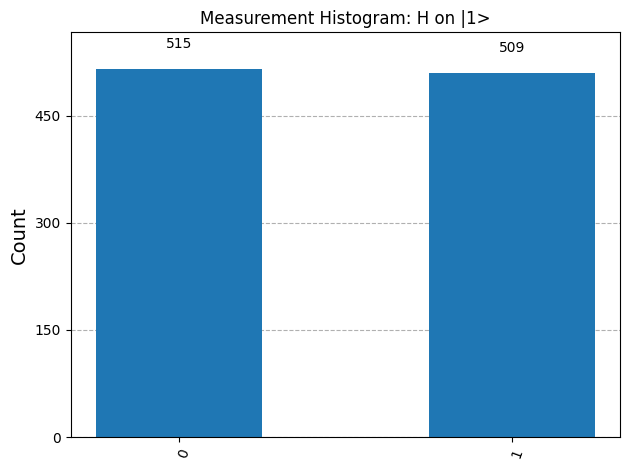



--- |+> ---
After Hadamard, statevector: [1.+0.j 0.+0.j]


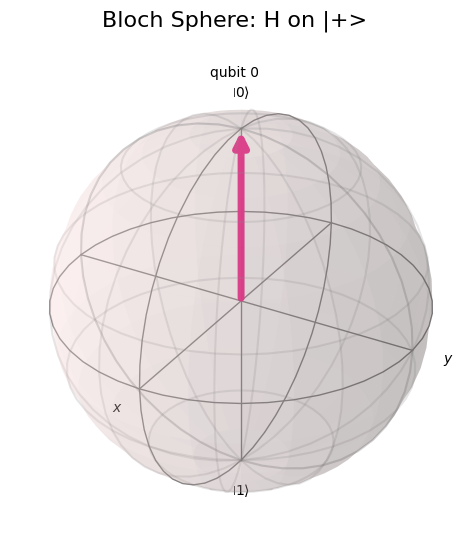

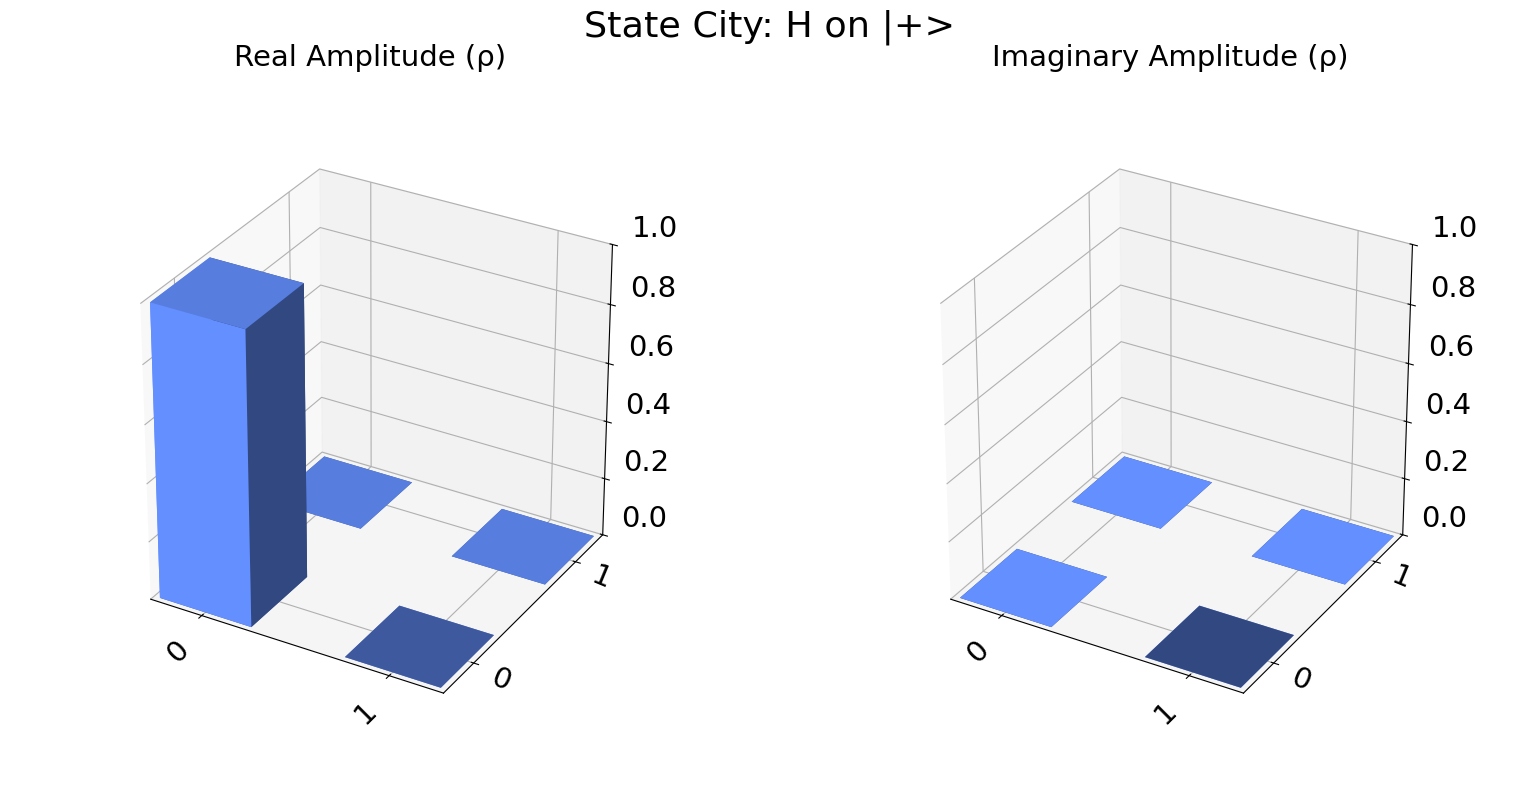

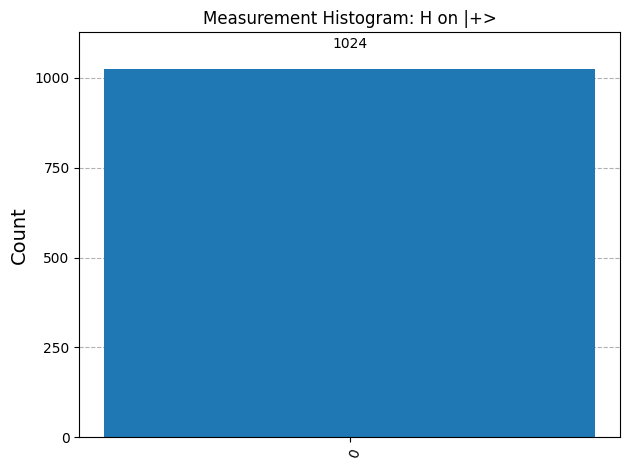



--- |-> ---
After Hadamard, statevector: [0.+0.j 1.+0.j]


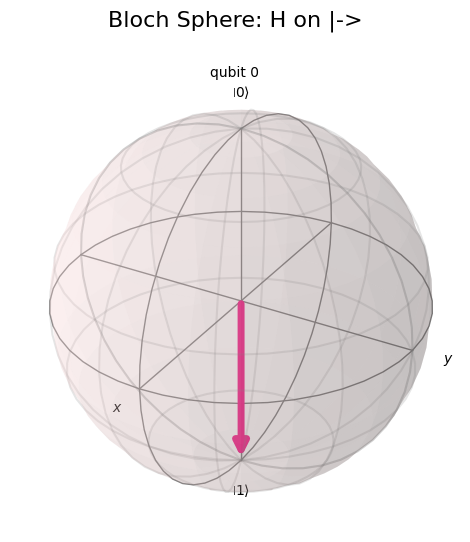

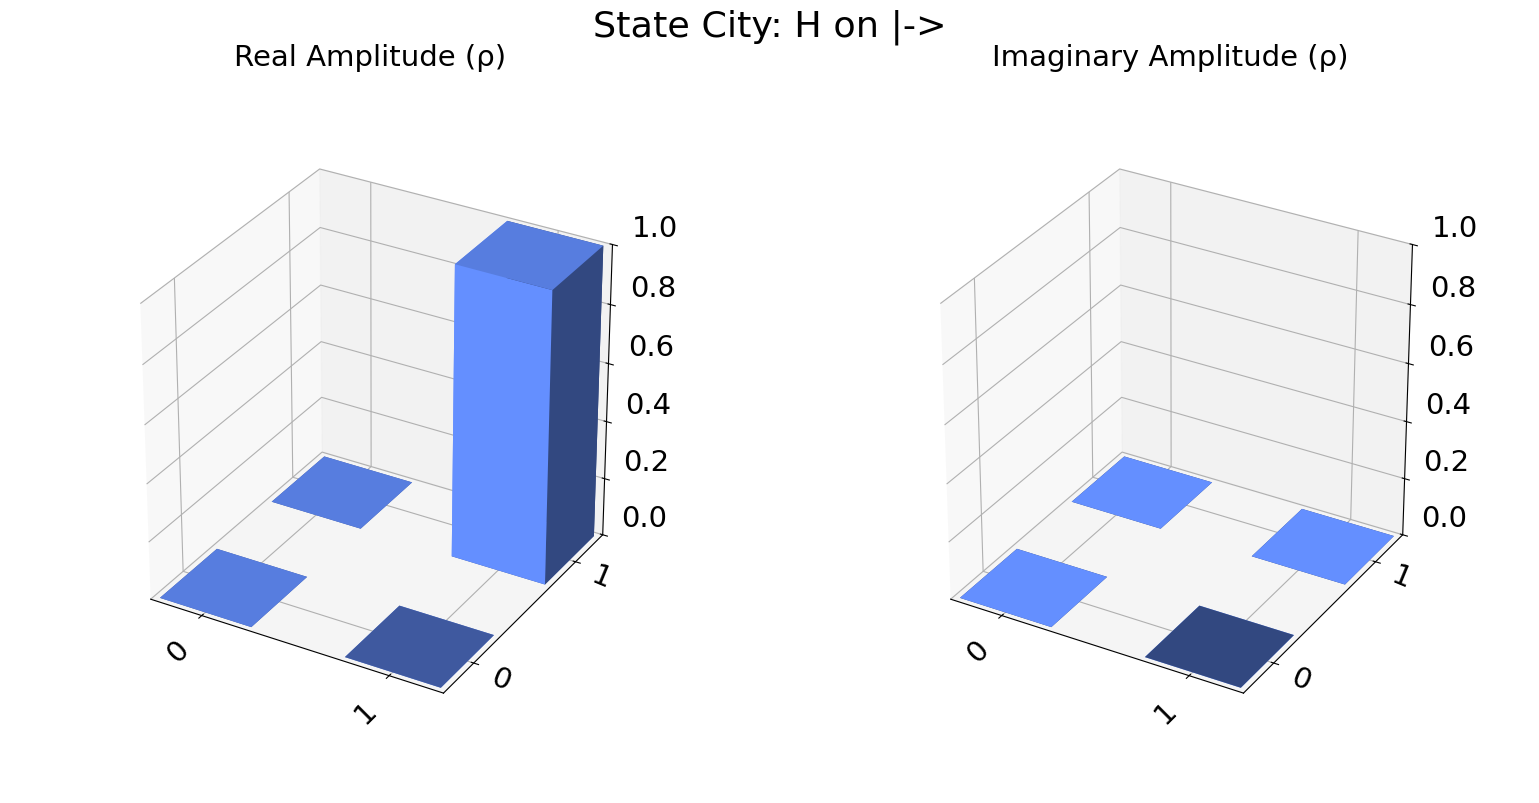

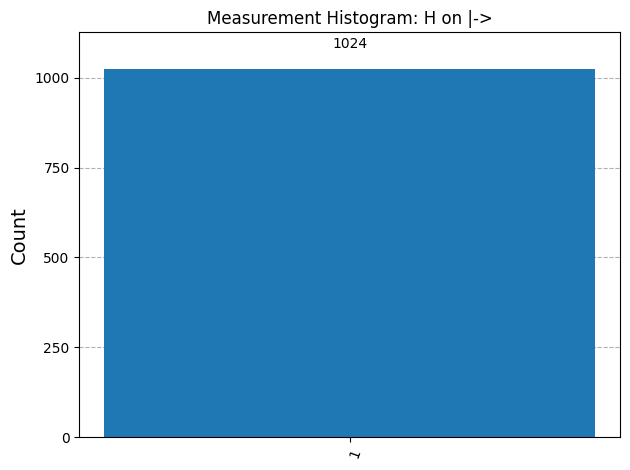

In [19]:
# Task 1
# |0>
visualize_hadamard(np.array([1, 0]), "|0>")

# |1>
visualize_hadamard(np.array([0, 1]), "|1>")

# |+> = (|0> + |1>)/√2
visualize_hadamard(np.array([1/np.sqrt(2), 1/np.sqrt(2)]), "|+>")

# |-> = (|0> - |1>)/√2
visualize_hadamard(np.array([1/np.sqrt(2), -1/np.sqrt(2)]), "|->")


--- Three-Qubit H⊗H⊗H on |000> ---
Statevector: [0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j
 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j]


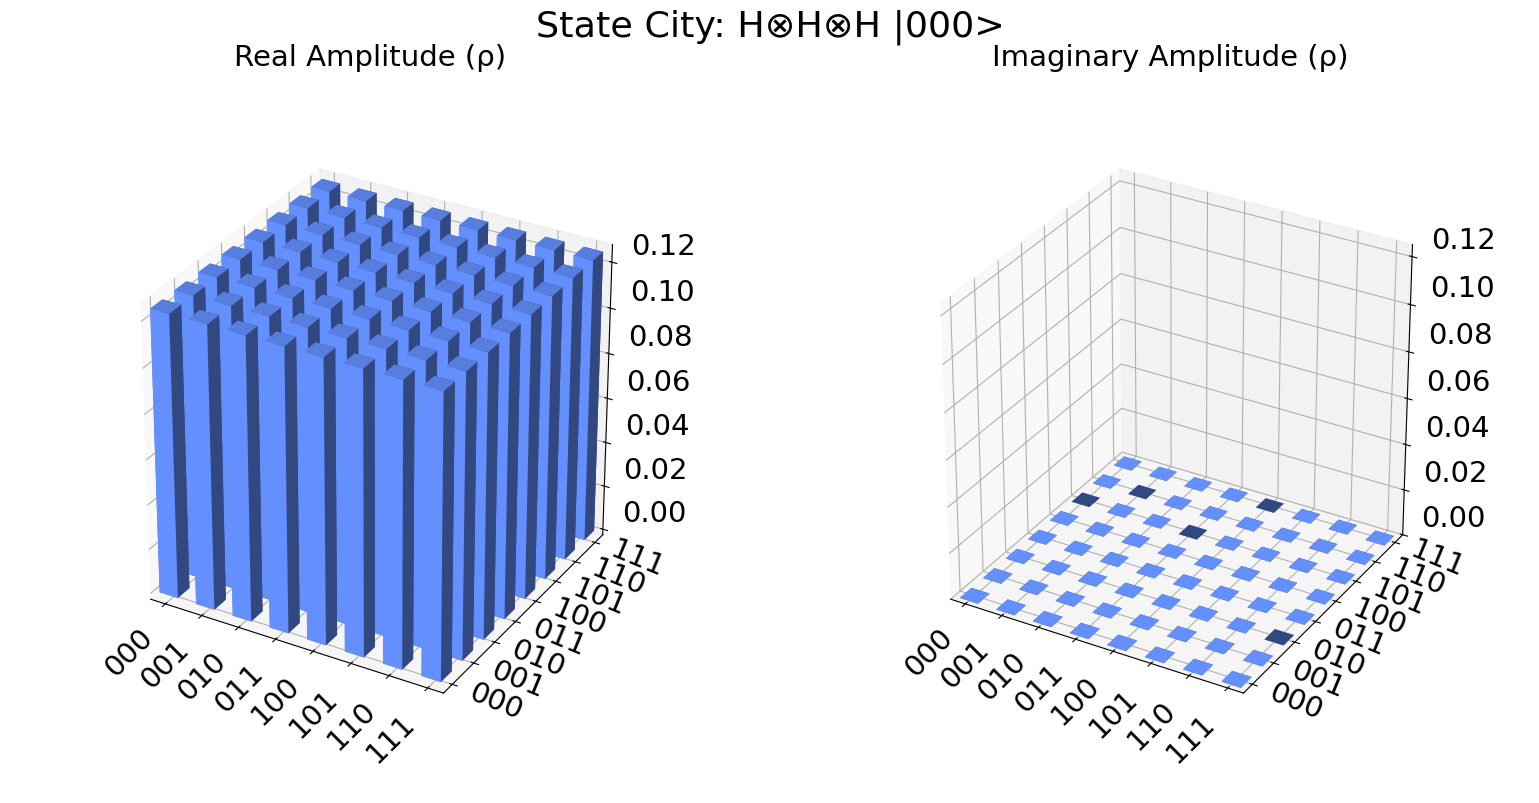

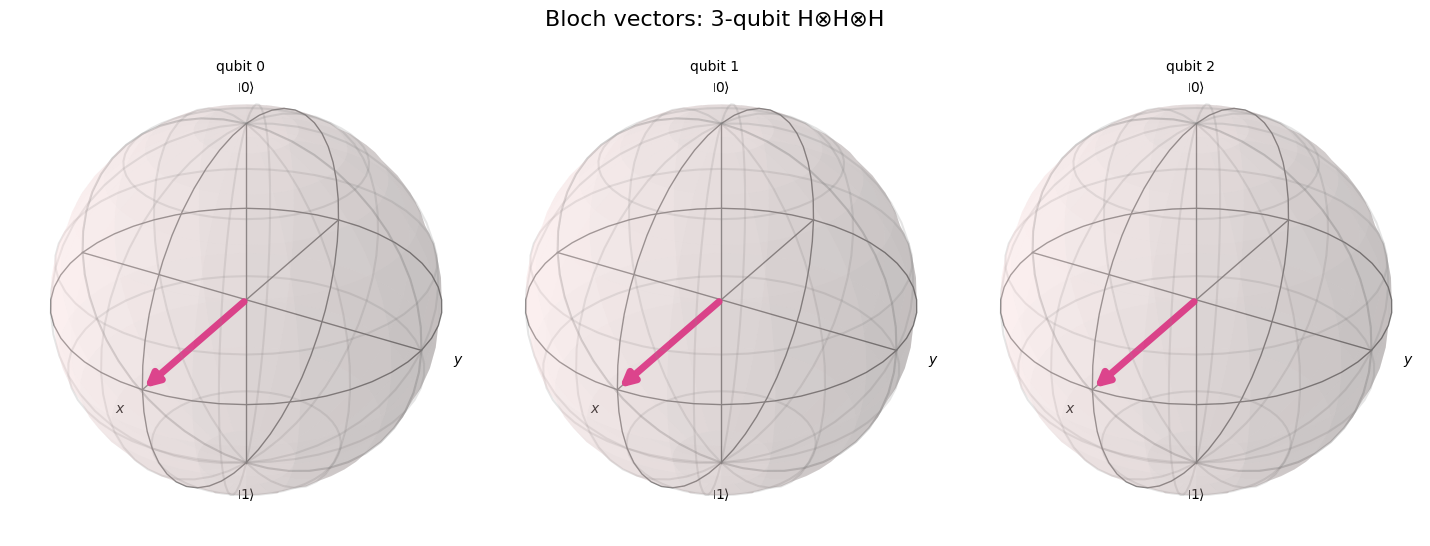

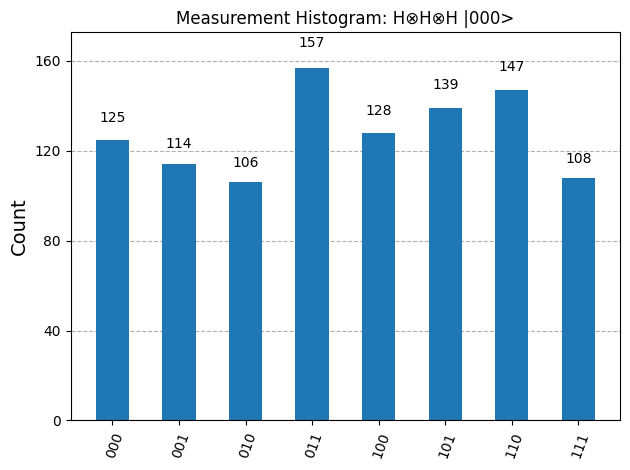


Analytical: equal probability for |000> to |111>, 1/8 each.



In [20]:
# Task 2
qc3 = QuantumCircuit(3, 3)
qc3.h([0, 1,2])
qc3.measure([0, 1, 2], [0, 1, 2])

# Statevector before measurement
qc3_state = QuantumCircuit(3)
qc3_state.h([0, 1, 2])
state3 = Statevector.from_instruction(qc3_state)
print("--- Three-Qubit H⊗H⊗H on |000> ---")
print("Statevector:", state3.data)

display(plot_state_city(state3, title="State City: H⊗H⊗H |000>"))
display(plot_bloch_multivector(state3, title="Bloch vectors: 3-qubit H⊗H⊗H"))

# Simulation
sim = AerSimulator()
qc3_t = transpile(qc3, sim)
result3 = sim.run(qc3_t, shots=1024).result()
counts3 = result3.get_counts()
display(plot_histogram(counts3, title="Measurement Histogram: H⊗H⊗H |000>"))
print("\nAnalytical: equal probability for |000> to |111>, 1/8 each.\n")

--- Three-Qubit entangled GHZ State (|000> + |111>)/√2 ---
Statevector: [0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


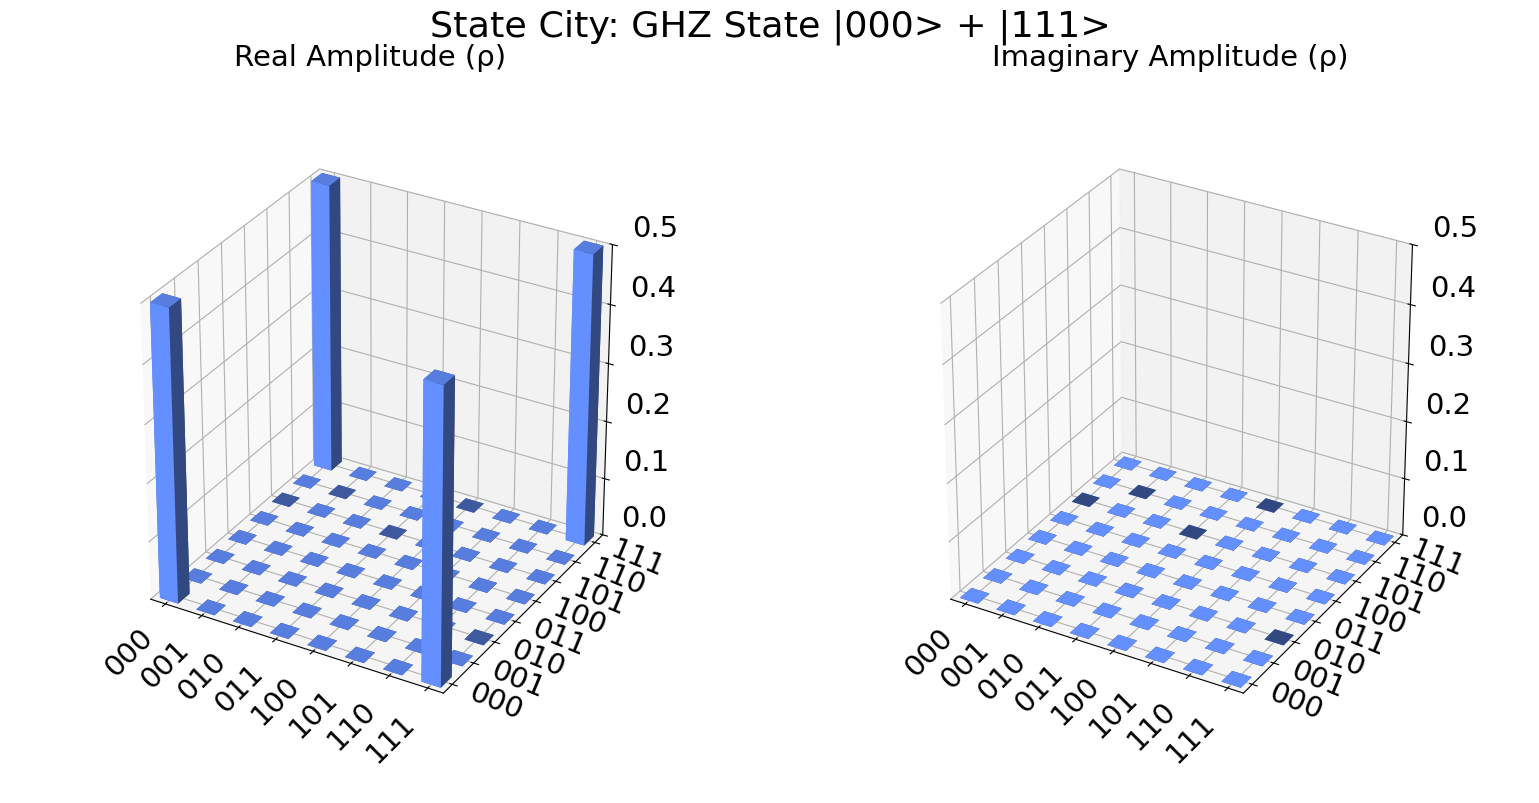

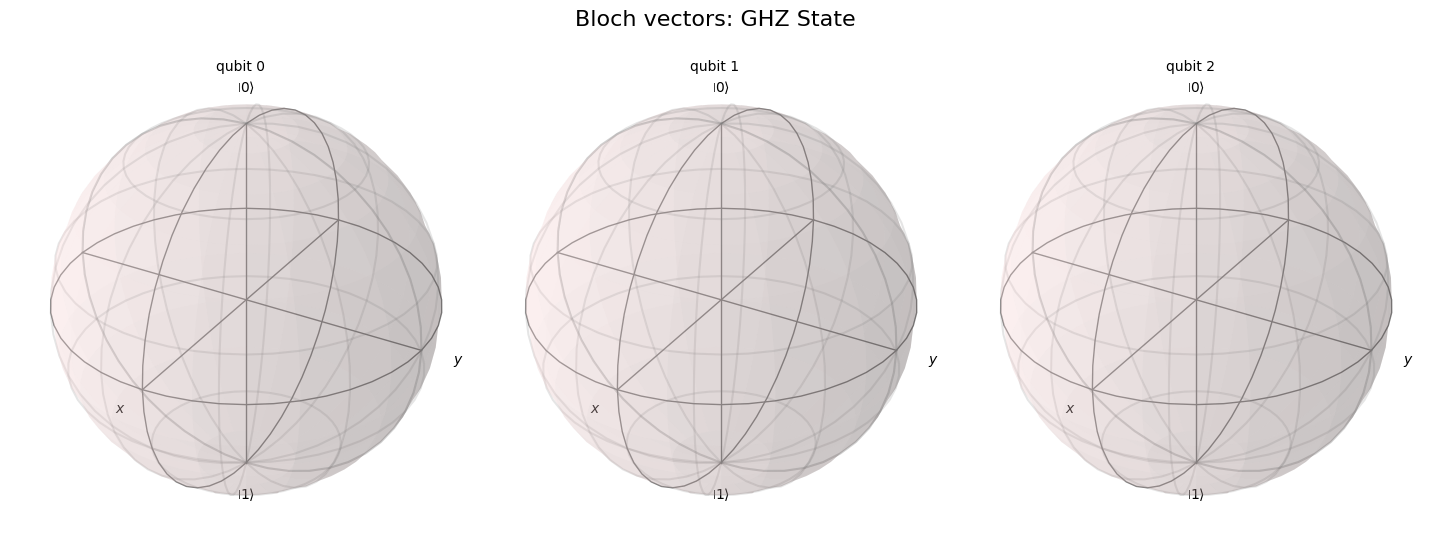

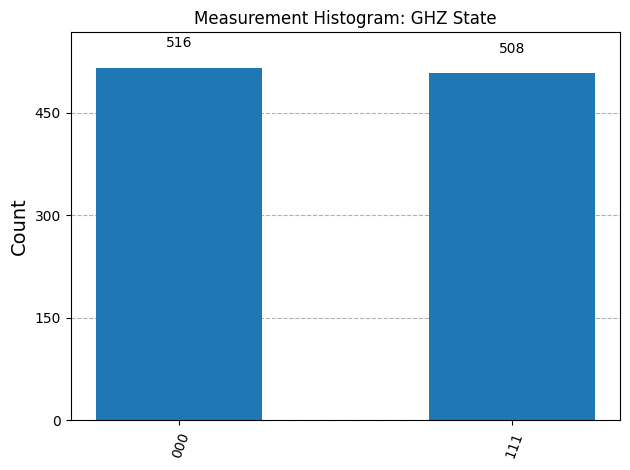


Analytical: outcomes |000> and |111> only, perfectly correlated across all three qubits.



In [21]:
# Task 3
qc_ent3 = QuantumCircuit(3, 3)
qc_ent3.h(0) # Hadamard on first qubit
qc_ent3.cx(0, 1) # First CNOT: control=0,target=1
qc_ent3.cx(1, 2) # Second CNOT: control=1, target=2
qc_ent3.measure([0, 1, 2], [0, 1, 2])

# Statevector before measurement
qc_ent3_state = QuantumCircuit(3)
qc_ent3_state.h(0)
qc_ent3_state.cx(0, 1)
qc_ent3_state.cx(1, 2)
state_ent3 = Statevector.from_instruction(qc_ent3_state)

print("--- Three-Qubit entangled GHZ State (|000> + |111>)/√2 ---")
print("Statevector:", state_ent3.data)

display(plot_state_city(state_ent3, title="State City: GHZ State |000> + |111>"))
display(plot_bloch_multivector(state_ent3, title="Bloch vectors: GHZ State"))

# Simulation
qc_ent3_t = transpile(qc_ent3, sim)
result_ent3 = sim.run(qc_ent3_t, shots=1024).result()
counts_ent3 = result_ent3.get_counts()
display(plot_histogram(counts_ent3, title="Measurement Histogram: GHZ State"))
print("\nAnalytical: outcomes |000> and |111> only, perfectly correlated across all three qubits.\n")

--- Apply H twice on |1> ---
Statevector after H twice: [0.+0.j 1.+0.j]


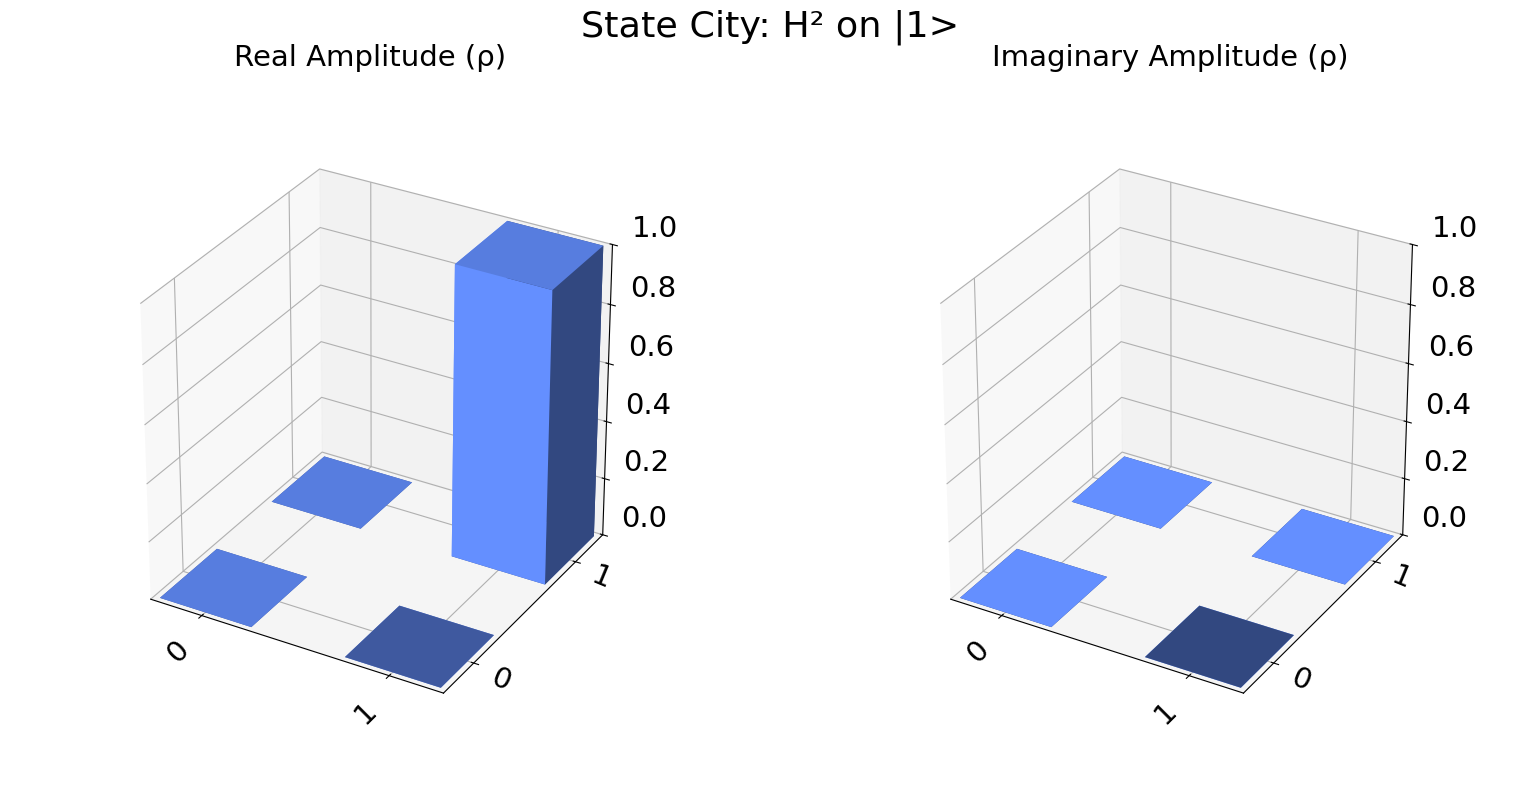

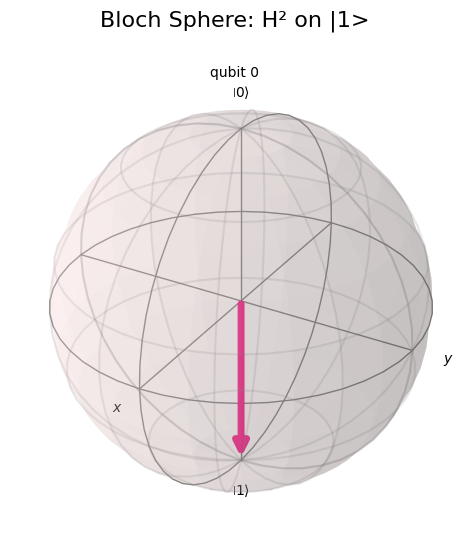

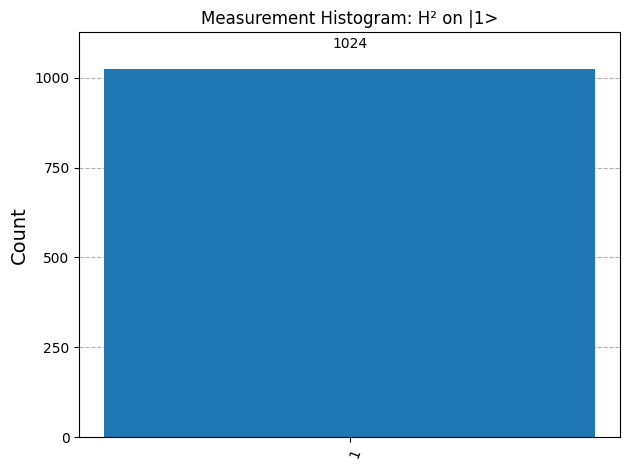


Analytical: Since H·H = I, the final state should be |1> again.



In [22]:
# Task 4
qc_h2 = QuantumCircuit(1, 1)
qc_h2.initialize([0, 1], 0) # Start with |1>
qc_h2.h(0)
qc_h2.h(0) # Apply H twice
qc_h2.measure(0, 0)

# Statevector before measurement
qc_h2_state = QuantumCircuit(1)
qc_h2_state.initialize([0, 1], 0)
qc_h2_state.h(0)
qc_h2_state.h(0)
state_h2 = Statevector.from_instruction(qc_h2_state)

print("--- Apply H twice on |1> ---")
print("Statevector after H twice:", state_h2.data)

display(plot_state_city(state_h2, title="State City: H² on |1>"))
display(plot_bloch_multivector(state_h2, title="Bloch Sphere: H² on |1>"))

# Simulation
sim = AerSimulator()
qc_h2_t = transpile(qc_h2, sim)
result_h2 = sim.run(qc_h2_t, shots=1024).result()
counts_h2 = result_h2.get_counts()
display(plot_histogram(counts_h2, title="Measurement Histogram: H² on |1>"))

print("\nAnalytical: Since H·H = I, the final state should be |1> again.\n")